## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Data Loading

In [4]:
os.listdir("input")

['MalwareData.csv']

In [5]:
data=pd.read_csv("input/MalwareData.csv")

***preliminary Analysis***

In [6]:
print(len(data))

5102


In [7]:
print(len(data.columns))

22


In [8]:
print(data.shape)

(5102, 22)


In [9]:
data["label"].value_counts()

N    3000
Y    2102
Name: label, dtype: int64

In [10]:
data.head(10)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,label
0,447,826,12,157,470,385,113,2824,210.28,384.45,...,8441,0.00,1726654.57,80843.08,3021,5420,609,155,3442,Y
1,0,211,0,0,128,104,14,0,0.00,0.00,...,0,0.00,0.00,0.00,0,0,0,0,1129,Y
2,164,485,10,58,268,219,39,1588,202.98,213.53,...,4828,0.00,514156.64,43342.31,1730,3172,407,102,1824,Y
3,37,29,8,42,19,19,6,133,108.14,46.32,...,685,0.02,12891.31,5009.32,295,390,121,38,222,Y
4,11,405,0,17,404,2,1,814,101.20,206.01,...,2033,0.00,238607.05,20848.47,813,1220,811,411,844,Y
5,106,240,7,344,127,105,33,952,218.17,215.17,...,5669,0.00,561159.25,46943.69,2301,3368,262,49,1411,Y
6,101,464,11,75,263,256,140,1339,106.50,337.36,...,4308,0.00,673377.60,35928.07,1556,2752,226,98,1532,Y
7,67,187,4,1,94,63,27,391,233.07,58.04,...,1780,0.02,43621.22,13527.84,718,1062,167,27,466,Y
8,105,344,9,40,207,171,58,1124,122.60,269.46,...,3848,0.00,494537.33,33034.94,1432,2416,279,105,1280,Y
9,0,83,0,0,42,16,27,0,0.00,0.00,...,0,0.00,0.00,0.00,0,0,0,0,186,Y


## Data preprocessing

***Null-Values Analysis***

In [11]:
print(data.isnull().sum())

LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
label                    0
dtype: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              5102 non-null   int64  
 1   BRANCH_COUNT           5102 non-null   int64  
 2   LOC_CODE_AND_COMMENT   5102 non-null   int64  
 3   LOC_COMMENTS           5102 non-null   int64  
 4   CYCLOMATIC_COMPLEXITY  5102 non-null   int64  
 5   DESIGN_COMPLEXITY      5102 non-null   int64  
 6   ESSENTIAL_COMPLEXITY   5102 non-null   int64  
 7   LOC_EXECUTABLE         5102 non-null   int64  
 8   HALSTEAD_CONTENT       5102 non-null   float64
 9   HALSTEAD_DIFFICULTY    5102 non-null   float64
 10  HALSTEAD_EFFORT        5102 non-null   float64
 11  HALSTEAD_ERROR_EST     5102 non-null   float64
 12  HALSTEAD_LENGTH        5102 non-null   int64  
 13  HALSTEAD_LEVEL         5102 non-null   float64
 14  HALSTEAD_PROG_TIME     5102 non-null   float64
 15  HALS

In [13]:
print(data["label"].unique())

['Y' 'N']


In [14]:
data["label"].value_counts()

N    3000
Y    2102
Name: label, dtype: int64

## Data Visualization

***Pie-chart***

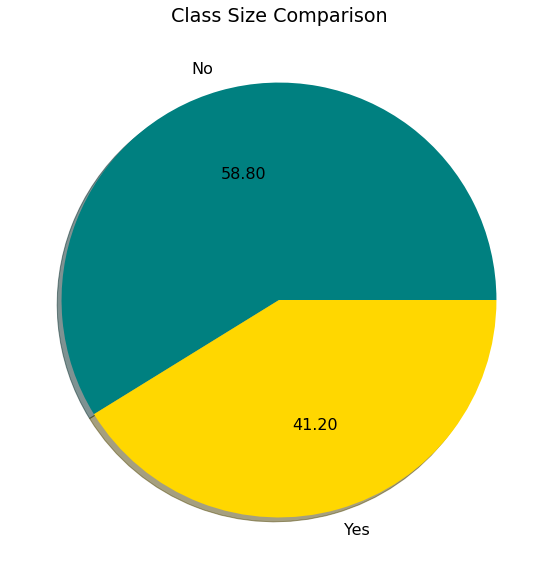

In [15]:
plt.figure(figsize=(10,10))
plt.rcParams["font.size"]=16
labels=["No","Yes"]
colors=["teal","gold"]
plt.pie(x=data["label"].value_counts(),labels=labels,colors=colors,autopct="%.2f",shadow=True)
plt.title("Class Size Comparison")
plt.show()

***Bar-chart***

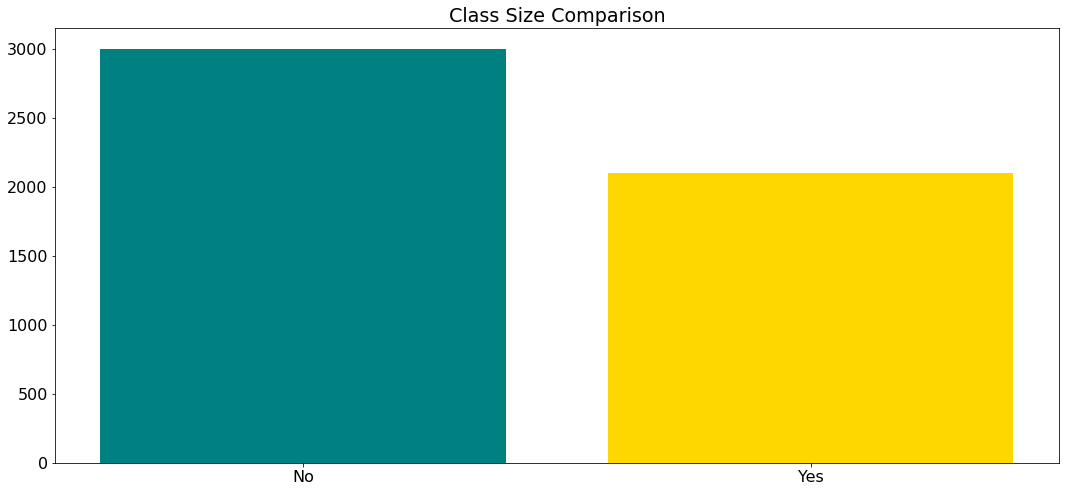

In [20]:
plt.figure(figsize=(18,8))
plt.bar(height=data["label"].value_counts(),x=labels,color=colors)
plt.title("Class Size Comparison")
plt.show()

***Checking features with Object datatype***

In [21]:
object_datatype=[col for col in data.columns if data[col].dtype=="O"]

In [22]:
print(object_datatype)

[]


***Label Encoding***

In [23]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
data["label"]=labelencoder.fit_transform(data["label"])

In [24]:
data["label"].unique()

array([1, 0], dtype=int64)

In [25]:
data["label"].value_counts()

0    3000
1    2102
Name: label, dtype: int64

***Features and class seperation***

In [26]:
X=data.drop("label",axis=1)
y=data["label"]

In [27]:
print(X.shape,y.shape)

(5102, 21) (5102,)


***resizing the distribution of values***

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

X=sc.transform(X)

In [29]:
import pickle
with open(file="models/StandardScaler.pkl",mode="wb") as file:
    pickle.dump(obj=sc,file=file)

***Data Oversampling***

In [30]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)

In [31]:
print(X.shape,y.shape)

(6000, 21) (6000,)


In [32]:
y.value_counts()

1    3000
0    3000
Name: label, dtype: int64

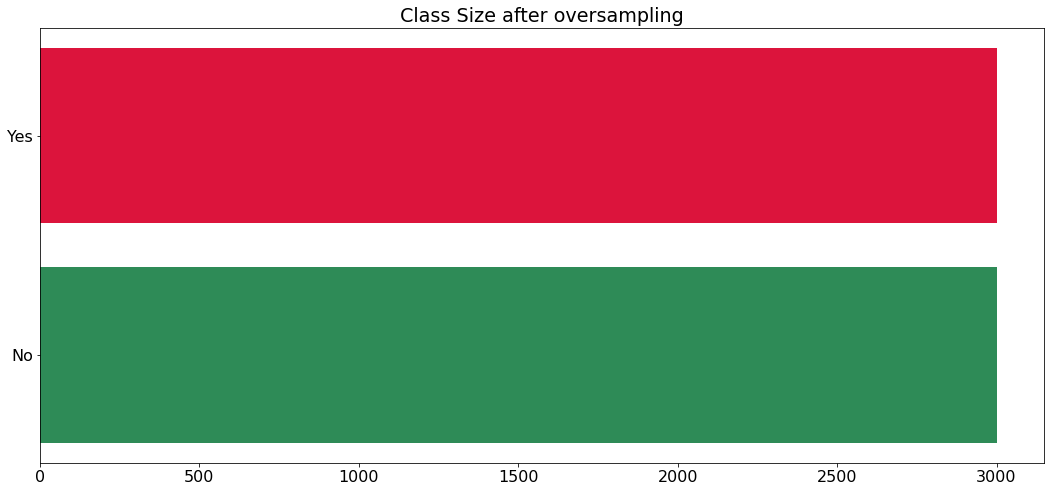

In [33]:
plt.figure(figsize=(18,8))
plt.barh(y=labels,width=y.value_counts(),color=["seagreen","crimson"])
plt.title(label="Class Size after oversampling")
plt.show()

## Data Splitting

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4800, 21) (1200, 21) (4800,) (1200,)


## Model-1 RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X,y)
predictions = rfc.predict(X_test)

In [37]:
print(predictions)

[1 0 1 ... 0 1 1]


## Result Analysis

In [38]:
class_labels=["No","Yes"]

### Accuracy Score

In [39]:
RF_accuracy = accuracy_score(y_true=y_test, y_pred= predictions)
print("Overall accuracy of RF model using test-set is {:.2f}%" .format(RF_accuracy*100.0))

Overall accuracy of RF model using test-set is 98.33%


### Classification Report

In [40]:
print(classification_report(y_true=y_test, y_pred=predictions,target_names=class_labels))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98       577
         Yes       0.99      0.97      0.98       623

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



### Confusion Matrix

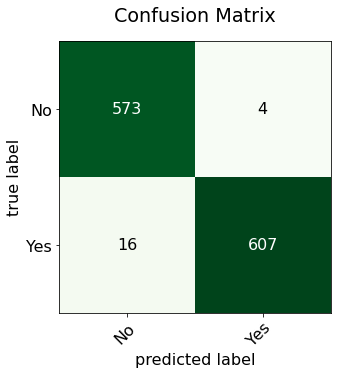

In [41]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test, predictions),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Greens)
plt.title(label="Confusion Matrix")
plt.show()

In [42]:
with open(file="models/RandomForestClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=rfc,file=file)

## Model-2 ANN (Artificial Neural Network)

In [43]:
# importing the libraries for deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [44]:
input_dim = 21
model = Sequential()
model.add(Dense(64, input_dim = input_dim , activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(296, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = Adam(learning_rate=1e-4), metrics = ['accuracy'] )

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 296)               76072     
                                                                 
 dropout_1 (Dropout)         (None, 296)               0

In [54]:
history=model.fit(X, y, epochs = 300, batch_size = 64, validation_data=(X_test,y_test))

Epoch 1/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2743 - accuracy: 0.8745 - val_loss: 0.2051 - val_accuracy: 0.9100
Epoch 2/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2801 - accuracy: 0.8680 - val_loss: 0.1971 - val_accuracy: 0.9117
Epoch 3/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2678 - accuracy: 0.8757 - val_loss: 0.2085 - val_accuracy: 0.9067
Epoch 4/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2707 - accuracy: 0.8712 - val_loss: 0.2062 - val_accuracy: 0.9075
Epoch 5/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2686 - accuracy: 0.8747 - val_loss: 0.2101 - val_accuracy: 0.9108
Epoch 6/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2808 - accuracy: 0.8693 - val_loss: 0.2073 - val_accuracy: 0.9100
Epoch 7/300
94/94 [==============================] - 1s 8ms/step - loss: 0.2762 - accuracy: 0.8648 - val_loss: 0.2029 - val_accuracy: 0.9117
Epoch 8/300
9

94/94 [==============================] - 1s 8ms/step - loss: 0.2555 - accuracy: 0.8787 - val_loss: 0.1824 - val_accuracy: 0.9183
Epoch 59/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2500 - accuracy: 0.8850 - val_loss: 0.1897 - val_accuracy: 0.9242
Epoch 60/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2540 - accuracy: 0.8820 - val_loss: 0.1835 - val_accuracy: 0.9167
Epoch 61/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2596 - accuracy: 0.8835 - val_loss: 0.1808 - val_accuracy: 0.9225
Epoch 62/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2491 - accuracy: 0.8838 - val_loss: 0.1844 - val_accuracy: 0.9242
Epoch 63/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2577 - accuracy: 0.8820 - val_loss: 0.1830 - val_accuracy: 0.9183
Epoch 64/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2492 - accuracy: 0.8837 - val_loss: 0.1798 - val_accuracy: 0.9217
Epoch 65/300
94/94 

94/94 [==============================] - 1s 13ms/step - loss: 0.2324 - accuracy: 0.8937 - val_loss: 0.1594 - val_accuracy: 0.9208
Epoch 116/300
94/94 [==============================] - 1s 13ms/step - loss: 0.2293 - accuracy: 0.8960 - val_loss: 0.1580 - val_accuracy: 0.9333
Epoch 117/300
94/94 [==============================] - 1s 10ms/step - loss: 0.2252 - accuracy: 0.8963 - val_loss: 0.1635 - val_accuracy: 0.9283
Epoch 118/300
94/94 [==============================] - 1s 10ms/step - loss: 0.2297 - accuracy: 0.8963 - val_loss: 0.1667 - val_accuracy: 0.9267
Epoch 119/300
94/94 [==============================] - 1s 9ms/step - loss: 0.2243 - accuracy: 0.8945 - val_loss: 0.1576 - val_accuracy: 0.9325
Epoch 120/300
94/94 [==============================] - 1s 9ms/step - loss: 0.2308 - accuracy: 0.8935 - val_loss: 0.1648 - val_accuracy: 0.9258
Epoch 121/300
94/94 [==============================] - 1s 10ms/step - loss: 0.2338 - accuracy: 0.8910 - val_loss: 0.1619 - val_accuracy: 0.9275
Epoch 12

94/94 [==============================] - 1s 7ms/step - loss: 0.2089 - accuracy: 0.9052 - val_loss: 0.1406 - val_accuracy: 0.9358
Epoch 173/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2089 - accuracy: 0.8997 - val_loss: 0.1474 - val_accuracy: 0.9333
Epoch 174/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2246 - accuracy: 0.8977 - val_loss: 0.1462 - val_accuracy: 0.9350
Epoch 175/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2212 - accuracy: 0.8995 - val_loss: 0.1455 - val_accuracy: 0.9392
Epoch 176/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2102 - accuracy: 0.9040 - val_loss: 0.1374 - val_accuracy: 0.9375
Epoch 177/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2021 - accuracy: 0.9060 - val_loss: 0.1439 - val_accuracy: 0.9392
Epoch 178/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2110 - accuracy: 0.9038 - val_loss: 0.1487 - val_accuracy: 0.9350
Epoch 179/300

94/94 [==============================] - 1s 7ms/step - loss: 0.1962 - accuracy: 0.9107 - val_loss: 0.1335 - val_accuracy: 0.9408
Epoch 230/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1985 - accuracy: 0.9088 - val_loss: 0.1410 - val_accuracy: 0.9383
Epoch 231/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2040 - accuracy: 0.9068 - val_loss: 0.1367 - val_accuracy: 0.9375
Epoch 232/300
94/94 [==============================] - 1s 7ms/step - loss: 0.2017 - accuracy: 0.9065 - val_loss: 0.1319 - val_accuracy: 0.9458
Epoch 233/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1971 - accuracy: 0.9112 - val_loss: 0.1326 - val_accuracy: 0.9408
Epoch 234/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1976 - accuracy: 0.9113 - val_loss: 0.1393 - val_accuracy: 0.9317
Epoch 235/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1935 - accuracy: 0.9147 - val_loss: 0.1338 - val_accuracy: 0.9392
Epoch 236/300

94/94 [==============================] - 1s 7ms/step - loss: 0.1828 - accuracy: 0.9193 - val_loss: 0.1237 - val_accuracy: 0.9475
Epoch 287/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1869 - accuracy: 0.9157 - val_loss: 0.1305 - val_accuracy: 0.9458
Epoch 288/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1886 - accuracy: 0.9093 - val_loss: 0.1270 - val_accuracy: 0.9458
Epoch 289/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1783 - accuracy: 0.9167 - val_loss: 0.1212 - val_accuracy: 0.9442
Epoch 290/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1897 - accuracy: 0.9155 - val_loss: 0.1235 - val_accuracy: 0.9442
Epoch 291/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1883 - accuracy: 0.9175 - val_loss: 0.1352 - val_accuracy: 0.9392
Epoch 292/300
94/94 [==============================] - 1s 7ms/step - loss: 0.1889 - accuracy: 0.9140 - val_loss: 0.1250 - val_accuracy: 0.9458
Epoch 293/300

## Accuracy and Loss Plot-Graphs

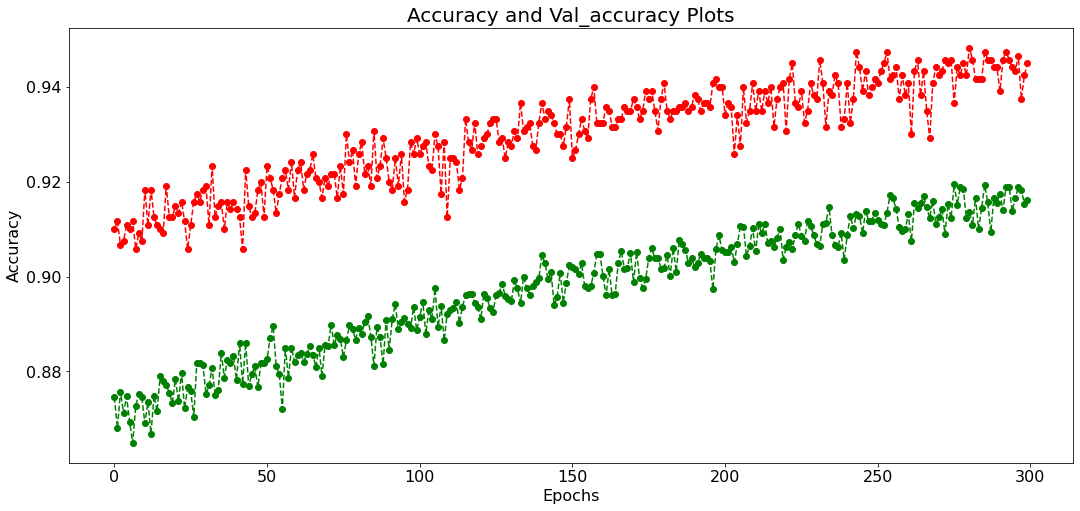

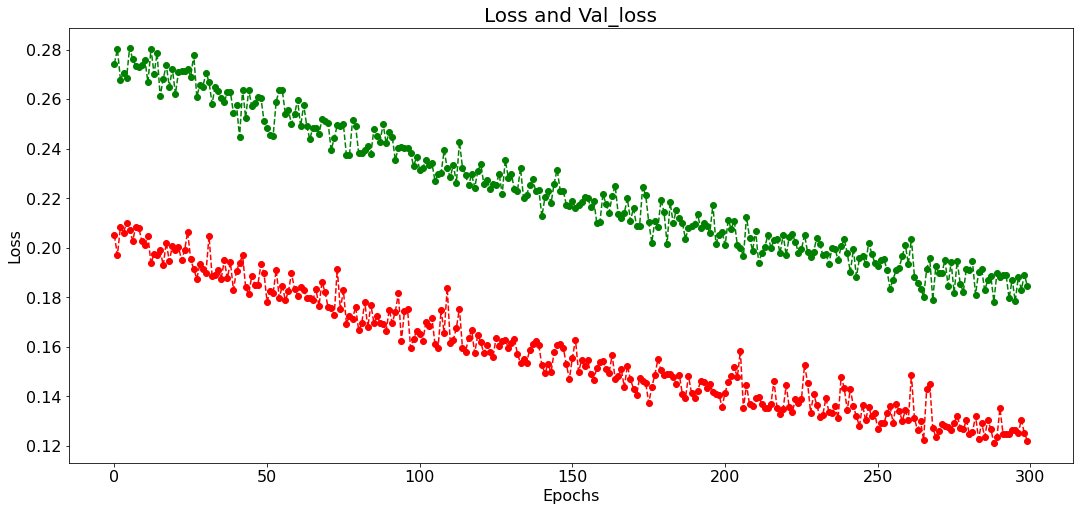

In [55]:
plt.figure(figsize=(18,8))
plt.plot(history.history["accuracy"],color='green', marker='o', linestyle='dashed')
plt.plot(history.history["val_accuracy"],color='red', marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy and Val_accuracy Plots",fontsize=20)
plt.show()

plt.figure(figsize=(18,8))
plt.plot(history.history["loss"],color='green', marker='o', linestyle='dashed')
plt.plot(history.history["val_loss"],color='red', marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss and Val_loss",fontsize=20)
plt.show()

***ANN Model Accuracy***

In [56]:
Accuracy=model.evaluate(x=X_test,y=y_test,batch_size=10)
print("Ann model accuracy is:",Accuracy[1])

120/120 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.9450
Ann model accuracy is: 0.9449999928474426


***Model Prediction***

In [57]:
Ann_pred=model.predict(X_test,batch_size=10,verbose=1)

120/120 [==============================] - 0s 2ms/step


In [58]:
print(Ann_pred)

[[1.        ]
 [0.19443923]
 [0.9998568 ]
 ...
 [0.00417504]
 [0.9999988 ]
 [0.99999964]]


In [59]:
y_pred = [1 if i>0.5 else 0 for i in Ann_pred]
print(y_pred)

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 

In [60]:
print(y_test)

1782    1
3917    0
221     1
2135    0
5224    1
       ..
2543    0
1773    1
2846    0
5799    1
1765    1
Name: label, Length: 1200, dtype: int64


## Result Analysis

### Classification Report

In [61]:
print(classification_report(y_true=y_test,y_pred=y_pred,target_names=class_labels))

              precision    recall  f1-score   support

          No       0.92      0.98      0.94       577
         Yes       0.98      0.92      0.95       623

    accuracy                           0.94      1200
   macro avg       0.95      0.95      0.94      1200
weighted avg       0.95      0.94      0.95      1200



### Confusion Matrix

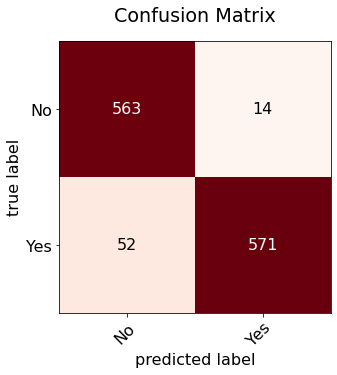

In [62]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=y_test,y_pred=y_pred),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="Confusion Matrix")
plt.show()

In [63]:
model.save(filepath="models/ArtificialNeuralNetwork_model.h5")

## Model Comparision

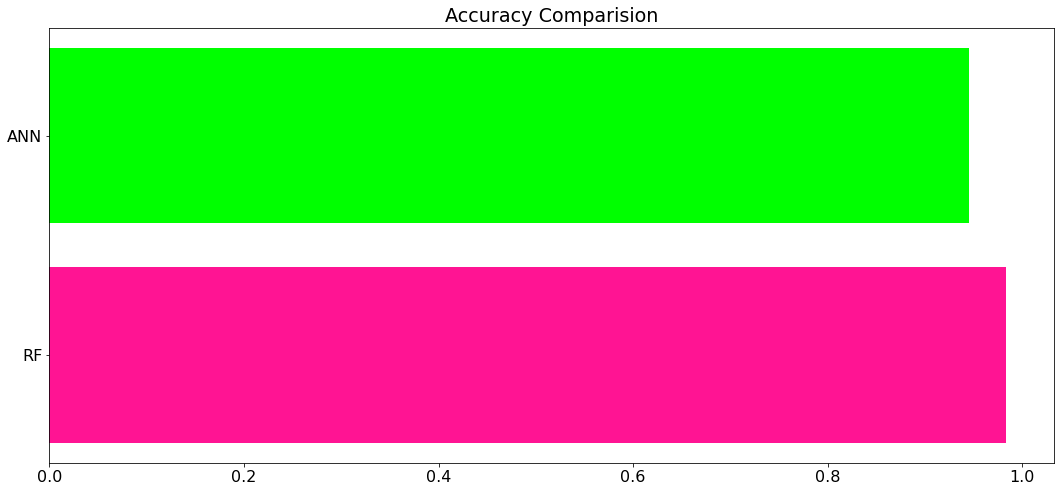

In [64]:
Accuracy_data=[RF_accuracy,Accuracy[1]]
labels=["RF","ANN"]
colors=["deeppink","lime"]
plt.figure(figsize=(18,8))
plt.barh(y=labels,width=Accuracy_data,color=colors,)
plt.title(label="Accuracy Comparision")
plt.show()

## Thank You